### Lab Description
In this lab, you will prepare your dataset for Machine Learning models. Go back to **Lab 1 - Part b**, if any of the answers were wrong, find out why then fix your code. We will continue on the same dataset. Tasks you should perform are as follow: 

- data imputation
- data transformation

### Lab Tasks
- group by vehicles by cylinders. Replace missing values in each column by the median of available values in that column grouped by cylinders. 

### Lab Questions
1. Consider column ``horsepower``. The vehicle with how many cylinders are experiencing missing values in column ``horsepower``?
2. How many unique car names are in this dataset? 
3. After handling the above two scenarios, which columns need further data transformation? 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('auto.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [5]:
#df = df.replace(['?',' ?'],np.NaN, inplace = True)
df.replace([' ?','?'],np.nan, inplace = True)


In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [7]:
#df['horsepower'] = df['horsepower'].astype(float)
#df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'] = df['horsepower'].apply(pd.to_numeric, errors = 'ignore')
#df['horsepower'] = df ['horsepower'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      391 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
model year      397 non-null int64
origin          397 non-null int64
car name        397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [9]:
df.median()

mpg               23.0
cylinders          4.0
displacement     146.0
horsepower        93.0
weight          2800.0
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [10]:
#df_cylinders=df.groupby('cylinders').count()
#df_cylinders
cylinders = df.cylinders[df.horsepower.isnull()].value_counts()
cylinders

4    5
6    1
Name: cylinders, dtype: int64

In [11]:
####这个fillna 补的是整个column的median值
#df_fillna = df.fillna(df.median())
#df_fillna

In [12]:
df_carname_num = df['car name'].nunique()
df_carname_num

305

In [13]:
df_group =  df.groupby('cylinders')


In [14]:
df_imputed = df_group.transform(lambda grp:grp.fillna(grp.median()))
#df_imputed = df.groupby(['cylinders']).transform(lambda grp:grp.fillna(grp.median()))
df_imputed.head()

,mpg,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,350.0,165.0,3693,11.5,70,1
1,18.0,318.0,150.0,3436,11.0,70,1
2,16.0,304.0,150.0,3433,12.0,70,1
3,17.0,302.0,140.0,3449,10.5,70,1
4,15.0,429.0,198.0,4341,10.0,70,1


In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

In [16]:
col = df_imputed.columns.values.tolist()

X = df_imputed[col[1:-1]]

y = df_imputed[col[0]]
X=df_imputed.iloc[:,1:]
y=df_imputed.iloc[:,0]
X
y

0      15.0
1      18.0
2      16.0
3      17.0
4      15.0
5      14.0
6      14.0
7      14.0
8      15.0
9      15.0
10     14.0
11     15.0
12     14.0
13     24.0
14     22.0
15     18.0
16     21.0
17     27.0
18     26.0
19     25.0
20     24.0
21     25.0
22     26.0
23     21.0
24     10.0
25     10.0
26     11.0
27      9.0
28     27.0
29     28.0
       ... 
367    27.0
368    34.0
369    31.0
370    29.0
371    27.0
372    24.0
373    23.0
374    36.0
375    37.0
376    31.0
377    38.0
378    36.0
379    36.0
380    36.0
381    34.0
382    38.0
383    32.0
384    38.0
385    25.0
386    38.0
387    26.0
388    22.0
389    32.0
390    36.0
391    27.0
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64

In [17]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0 )
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train_org)

In [19]:
X_test = scaler.transform(X_test_org)

In [20]:
scaler=StandardScaler()

In [21]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

print(lreg.intercept_)

0.8220037318850947
0.8071877598034644
23.55824915824916


In [22]:
x_range = [0.01,0.1,1,10]
train_score_list = []
test_score_list = []

for alpha in x_range:
    ridge = Ridge(alpha, random_state=0)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.8220037186828552, 0.8220024290604278, 0.8218890778556917, 0.8175566518576092]
[0.8072017257357965, 0.8073241862206342, 0.8082663779712785, 0.8067811645271593]


Text(0.5,0,'$\\alpha$')

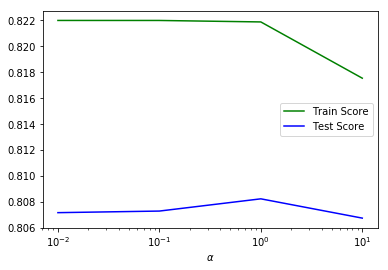

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 5)
plt.xlabel(r'$\alpha$')

In [24]:
x_range = [0.01,0.1,1,10]
train_score_list = []
test_score_list = []

for alpha in x_range:
    lasso = Lasso(alpha, random_state=0)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.8219172204494001, 0.8168261176104861, 0.7870546726017027, 0.0]
[0.8090545763915125, 0.8166934777541522, 0.799610906630805, -0.0002488620793819063]


Text(0.5,0,'$\\alpha$')

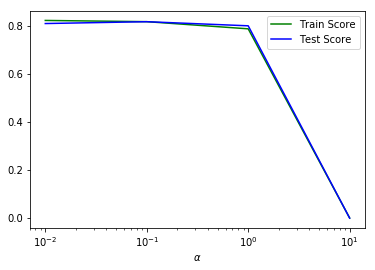

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 1)
plt.xlabel(r'$\alpha$')

In [26]:
train_score_array = []
test_score_array = []

neighbors = [1, 5, 10, 20]

for k in range(len(neighbors)):
    knn_reg = KNeighborsRegressor(neighbors[k])
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

In [27]:
print(train_score_array)
print(test_score_array)

[1.0, 0.9121643430015831, 0.8799789313803715, 0.8508446428456494]
[0.7212888344676367, 0.8463992510749779, 0.8553854614574136, 0.8487601847039896]


In [28]:
X_b = X_train[1:-1, 2].reshape(-1,1)
X_b

array([[-1.16613112],
       [-0.10802854],
       [-0.5569914 ],
       [-1.17782286],
       [ 0.68700986],
       [ 0.4414833 ],
       [ 0.16205068],
       [ 2.30280849],
       [-1.12521002],
       [-0.71015321],
       [ 1.44112717],
       [ 1.58142806],
       [ 0.50578787],
       [-1.00478509],
       [-0.26586705],
       [ 0.2427237 ],
       [ 1.466849  ],
       [ 1.04945384],
       [ 0.51747961],
       [ 1.38266846],
       [-0.36407767],
       [-0.89254437],
       [-0.87500676],
       [ 0.87992359],
       [ 1.97076304],
       [-0.56400645],
       [-0.71599908],
       [-0.73938256],
       [-0.99660087],
       [ 1.92984195],
       [-0.99660087],
       [-0.49853269],
       [-1.20705221],
       [-1.18600708],
       [ 0.43329908],
       [-0.22494595],
       [-0.99660087],
       [-1.21874395],
       [-1.0901348 ],
       [-0.88202181],
       [ 1.28562701],
       [-1.1485935 ],
       [ 2.24902648],
       [-1.22225147],
       [-0.04372396],
       [ 1

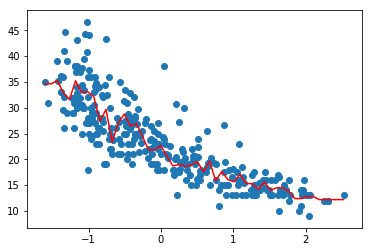

In [30]:
#X_b = X_train[1:, 2].reshape(-1,1)


#y_b = y_train[1:-1]
X_b = X_train[1:-1, 2].reshape(-1,1)
y_b = y_train[1:-1]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new = np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c='r')
plt.scatter(X_b, y_b)
plt.show()


In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('auto.csv')


In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [30]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
model year      397 non-null int64
origin          397 non-null int64
car name        397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [32]:
np.unique(df['car name'])

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

In [33]:
df_num_carname = df[['car name']].nunique()
df_num_carname

car name    305
dtype: int64

In [34]:
df.describe(include=['O'])

,horsepower,car name
count,397,397
unique,94,305
top,150,ford pinto
freq,22,6


In [35]:
data = df.replace(['?'],np.nan)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se


In [36]:
df_cylinder = data.groupby('cylinders').count()
df_cylinder

,mpg,displacement,horsepower,weight,acceleration,model year,origin,car name
cylinders,,,,,,,,
3,4,4,4,4,4,4,4,4
4,204,204,199,204,204,204,204,204
5,3,3,3,3,3,3,3,3
6,84,84,83,84,84,84,84,84
8,102,102,102,102,102,102,102,102
